<a href="https://colab.research.google.com/github/Fatema2525/Movie-Recommendation-System/blob/main/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk scikit-learn numpy pandas -q

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
df =pd.read_csv('/content/movies.csv')

In [4]:
df.shape

(4803, 24)

In [5]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [7]:
required_columns = ["genres", "keywords", "overview", "title", "director"]
df = df[required_columns]

In [8]:
df.shape

(4803, 5)

In [9]:
df.head(2)

,genres,keywords,overview,title,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Gore Verbinski


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4775 non-null   object
 1   keywords  4391 non-null   object
 2   overview  4800 non-null   object
 3   title     4803 non-null   object
 4   director  4773 non-null   object
dtypes: object(5)
memory usage: 187.7+ KB


In [11]:
df = df.dropna().reset_index(drop=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4383 non-null   object
 1   keywords  4383 non-null   object
 2   overview  4383 non-null   object
 3   title     4383 non-null   object
 4   director  4383 non-null   object
dtypes: object(5)
memory usage: 171.3+ KB


In [13]:
df['combined'] =df['genres'] + '' + df['keywords'] + '' + df['overview']

In [14]:
df.head(2)

,genres,keywords,overview,title,director,combined
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar,James Cameron,Action Adventure Fantasy Science Fictioncultur...
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Gore Verbinski,Adventure Fantasy Actionocean drug abuse exoti...


In [15]:
data = df[['title','combined']]

In [16]:
data.head(2)

,title,combined
0,Avatar,Action Adventure Fantasy Science Fictioncultur...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Actionocean drug abuse exoti...


In [17]:
data.shape

(4383, 2)

In [18]:
combined_text = " ".join(df['combined'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)

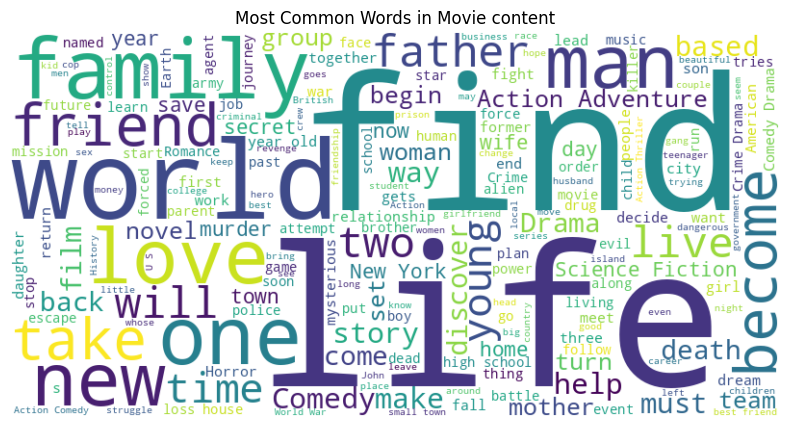

In [19]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Movie content")
plt.show()

In [20]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
  text = re.sub(r"[^a-zA-Z]", " ", text)
  text = text.lower()
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return " ".join(tokens)

In [22]:
data['cleaned_text'] = df['combined'].apply(preprocess_text)

/tmp/ipython-input-1183214757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = df['combined'].apply(preprocess_text)


In [23]:
data.head()

,title,combined,cleaned_text
0,Avatar,Action Adventure Fantasy Science Fictioncultur...,action adventure fantasy science fictioncultur...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Actionocean drug abuse exoti...,adventure fantasy actionocean drug abuse exoti...
2,Spectre,Action Adventure Crimespy based on novel secre...,action adventure crimespy based novel secret a...
3,The Dark Knight Rises,Action Crime Drama Thrillerdc comics crime fig...,action crime drama thrillerdc comics crime fig...
4,John Carter,Action Adventure Science Fictionbased on novel...,action adventure science fictionbased novel ma...


In [24]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [25]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [26]:
print(cosine_sim[0])

[1.         0.02811387 0.01596937 ... 0.00450133 0.         0.        ]


In [27]:
def recommend_movies(movie_name, cosine_sim=cosine_sim, df=data, top_n=5):
  idx = df[df['title'].str.lower() == movie_name.lower()].index
  if len(idx)==0:
    return "Movie Not Found"
  idx = idx[0]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:top_n+1]
  movie_indices = [i[0] for i in sim_scores]
  return df[['title']].iloc[movie_indices]

In [28]:
data["title"]

,title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
...,...
4378,Bang
4379,Primer
4380,El Mariachi
4381,"Signed, Sealed, Delivered"


In [29]:
row_index = df[df['title'] == "Batman v Superman: Dawn of Justice"].index
print(row_index)

Index([9], dtype='int64')


In [30]:
movie_name = data["title"][9]
print(movie_name)

Batman v Superman: Dawn of Justice


In [31]:
print(f"Recommendations for the movie{movie_name}")
recommendations = recommend_movies(movie_name)
print(recommendations)

Recommendations for the movieBatman v Superman: Dawn of Justice
                title
1685         Kick-Ass
14       Man of Steel
1401  Superhero Movie
3590         Defendor
297    Batman Forever
